In [49]:
import sys
sys.path.append('./src')

import io_utils
import metrics

df = io_utils.get_df()

df.info()

#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   order_id  2500 non-null   int64  
 1   date      2500 non-null   object 
 2   city      2500 non-null   object 
 3   category  2500 non-null   object 
 4   price     2500 non-null   float64
 5   units     2500 non-null   int64  
 6   revenue   2500 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 136.8+ KB


### 1. Vad säljer vi? – vilka kategorier driver mest intäkt?


Vad vi säljer:
['Sports' 'Clothing' 'Home' 'Electronics' 'Toys' 'Beauty']

Intäkt per kategori:
category
Electronics    1364228.07
Sports          734653.42
Clothing        586744.91
Home            511070.87
Beauty          163053.97
Toys            143015.99
Name: revenue, dtype: float64


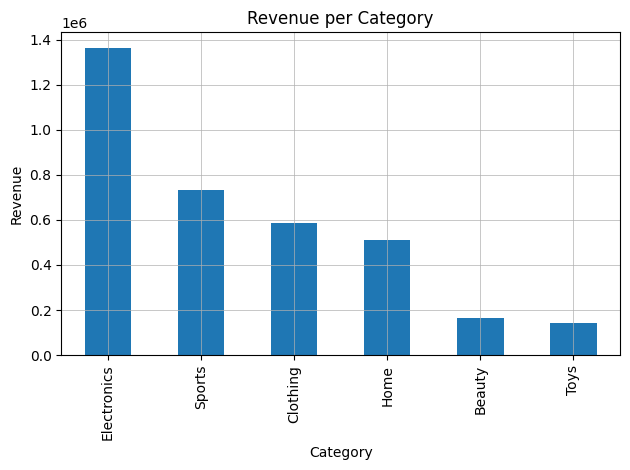

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data/ecommerce_sales.csv")
print("Vad vi säljer:")
print(df["category"].unique())

category_revenue = df.groupby("category")["revenue"].sum().sort_values(ascending=False)
print("\nIntäkt per kategori:")
print(category_revenue)

category_revenue.plot(kind="bar", title="Revenue per Category")

plt.xlabel("Category")
plt.ylabel("Revenue")

plt.grid(True, linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

### 2. Var säljer vi? – vilka städer står för störst intäkt?
Stockholm, Göteborg respektive Malmö står för störst intakt

In [ ]:
from metrics import units_per_city, top_cities
top_cities

In [ ]:
units_per_city

### 3. När säljer vi? – finns tidsmönster/säsong i försäljningen?


### 4. Hur ser en typisk order ut? – AOV (Average Order Value) och spridning.


Genomsnittligt ordervärde:    1401.11
Standardavvikelse:            1166.94
Lägsta ordervärdet:             50.00
Högsta ordervärdet:           9192.60
Name: revenue, dtype: float64


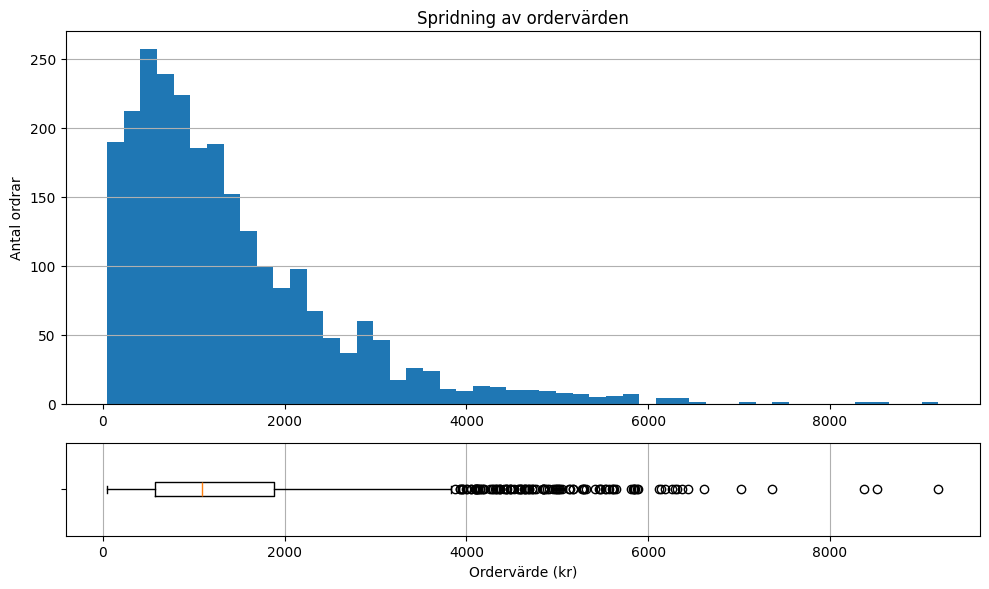

In [84]:
# AOV, standardavvikelse, lägsta och högsta ordervärde
order_value = df["revenue"].agg(["mean", "std", "min", "max"])
order_value.index = [
        "Genomsnittligt ordervärde:",
        "Standardavvikelse:",
        "Lägsta ordervärdet:",
        "Högsta ordervärdet:"
    ]
print(order_value.round(2))


# Spridning av ordervärden med histogram och boxplot
fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={"height_ratios":[4,1]})

ax_hist.hist(df["revenue"], bins=50)
ax_hist.set_title("Spridning av ordervärden")

ax_hist.set_ylabel("Antal ordrar")
ax_hist.grid(True, axis="y")

ax_box.boxplot(df["revenue"], vert=False)
ax_box.set_xlabel("Ordervärde (kr)")
ax_box.set_yticklabels("")
ax_box.grid(True, axis="x")
plt.tight_layout()

### 5. Topp-listor – topp-3 kategorier efter intäkt.


### 6. Eventuella avvikelser – något oväntat mönster som sticker ut?


### Rekommendationer:

Ni ska avsluta rapporten med 2–3 korta rekommendationer (punktlista) baserat på era resultat, t.ex. “Satsa på kategori X i stad Y under månad Z”.